In [1]:
import os
import sys
sys.path.append("..")

from utils.singletons.coco import COCO

s:\PolySecLabProjects\eeg-image-decoding\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
coco_file_path = os.path.join(os.getcwd(), "..\\..\\data\\all-joined-1\\coco\\train17-images-metadata.json")
coco = COCO(coco_file_path)
print(f"COCO dataset loaded successfully!")
print(f"Number of images: {len(coco.coco_dataset)}")

COCO dataset loaded successfully!
Number of images: 960


In [3]:
coco2 = COCO()
# Check if they're the same instance
print(f"Same instance? {coco is coco2}")
print(f"coco id: {id(coco)}")
print(f"coco2 id: {id(coco2)}")

Same instance? True
coco id: 1439343039952
coco2 id: 1439343039952


In [4]:
coco[0]

{'nsdId': '2951',
 'cocoId': '262146',
 'cocoSplit': 'train2017',
 'captions': ['a person skiing down a steep hill ',
  'A person skiing down a steep snowy hill.',
  'A person on snow skis going down a steep slope.',
  'A skier is skiing down a down hill slope. ',
  'A skier is shown taking on a very steep slope.'],
 'categories': [{'category_id': 1,
   'category_name': 'person',
   'supercategory_name': 'person'},
  {'category_id': 35, 'category_name': 'skis', 'supercategory_name': 'sports'},
  {'category_id': 27,
   'category_name': 'backpack',
   'supercategory_name': 'accessory'}]}

In [5]:
fine_categories = coco.get_fine_category_labels()
print(f"Number of fine categories: {len(fine_categories)}")
print(f"First 10 fine categories: {fine_categories[:10]}")

Number of fine categories: 80
First 10 fine categories: ['airplane', 'apple', 'backpack', 'banana', 'baseball bat', 'baseball glove', 'bear', 'bed', 'bench', 'bicycle']


In [6]:
super_categories = coco.get_supercategory_labels()
print(f"Number of super categories: {len(super_categories)}")
print(f"All super categories: {super_categories}")

Number of super categories: 12
All super categories: ['accessory', 'animal', 'appliance', 'electronic', 'food', 'furniture', 'indoor', 'kitchen', 'outdoor', 'person', 'sports', 'vehicle']


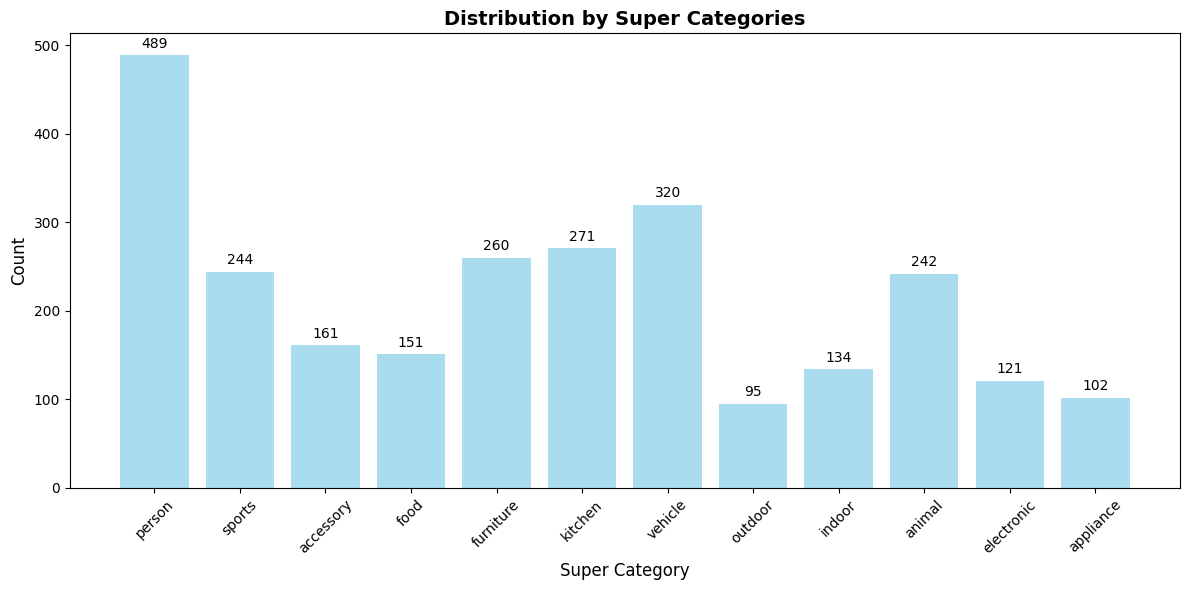

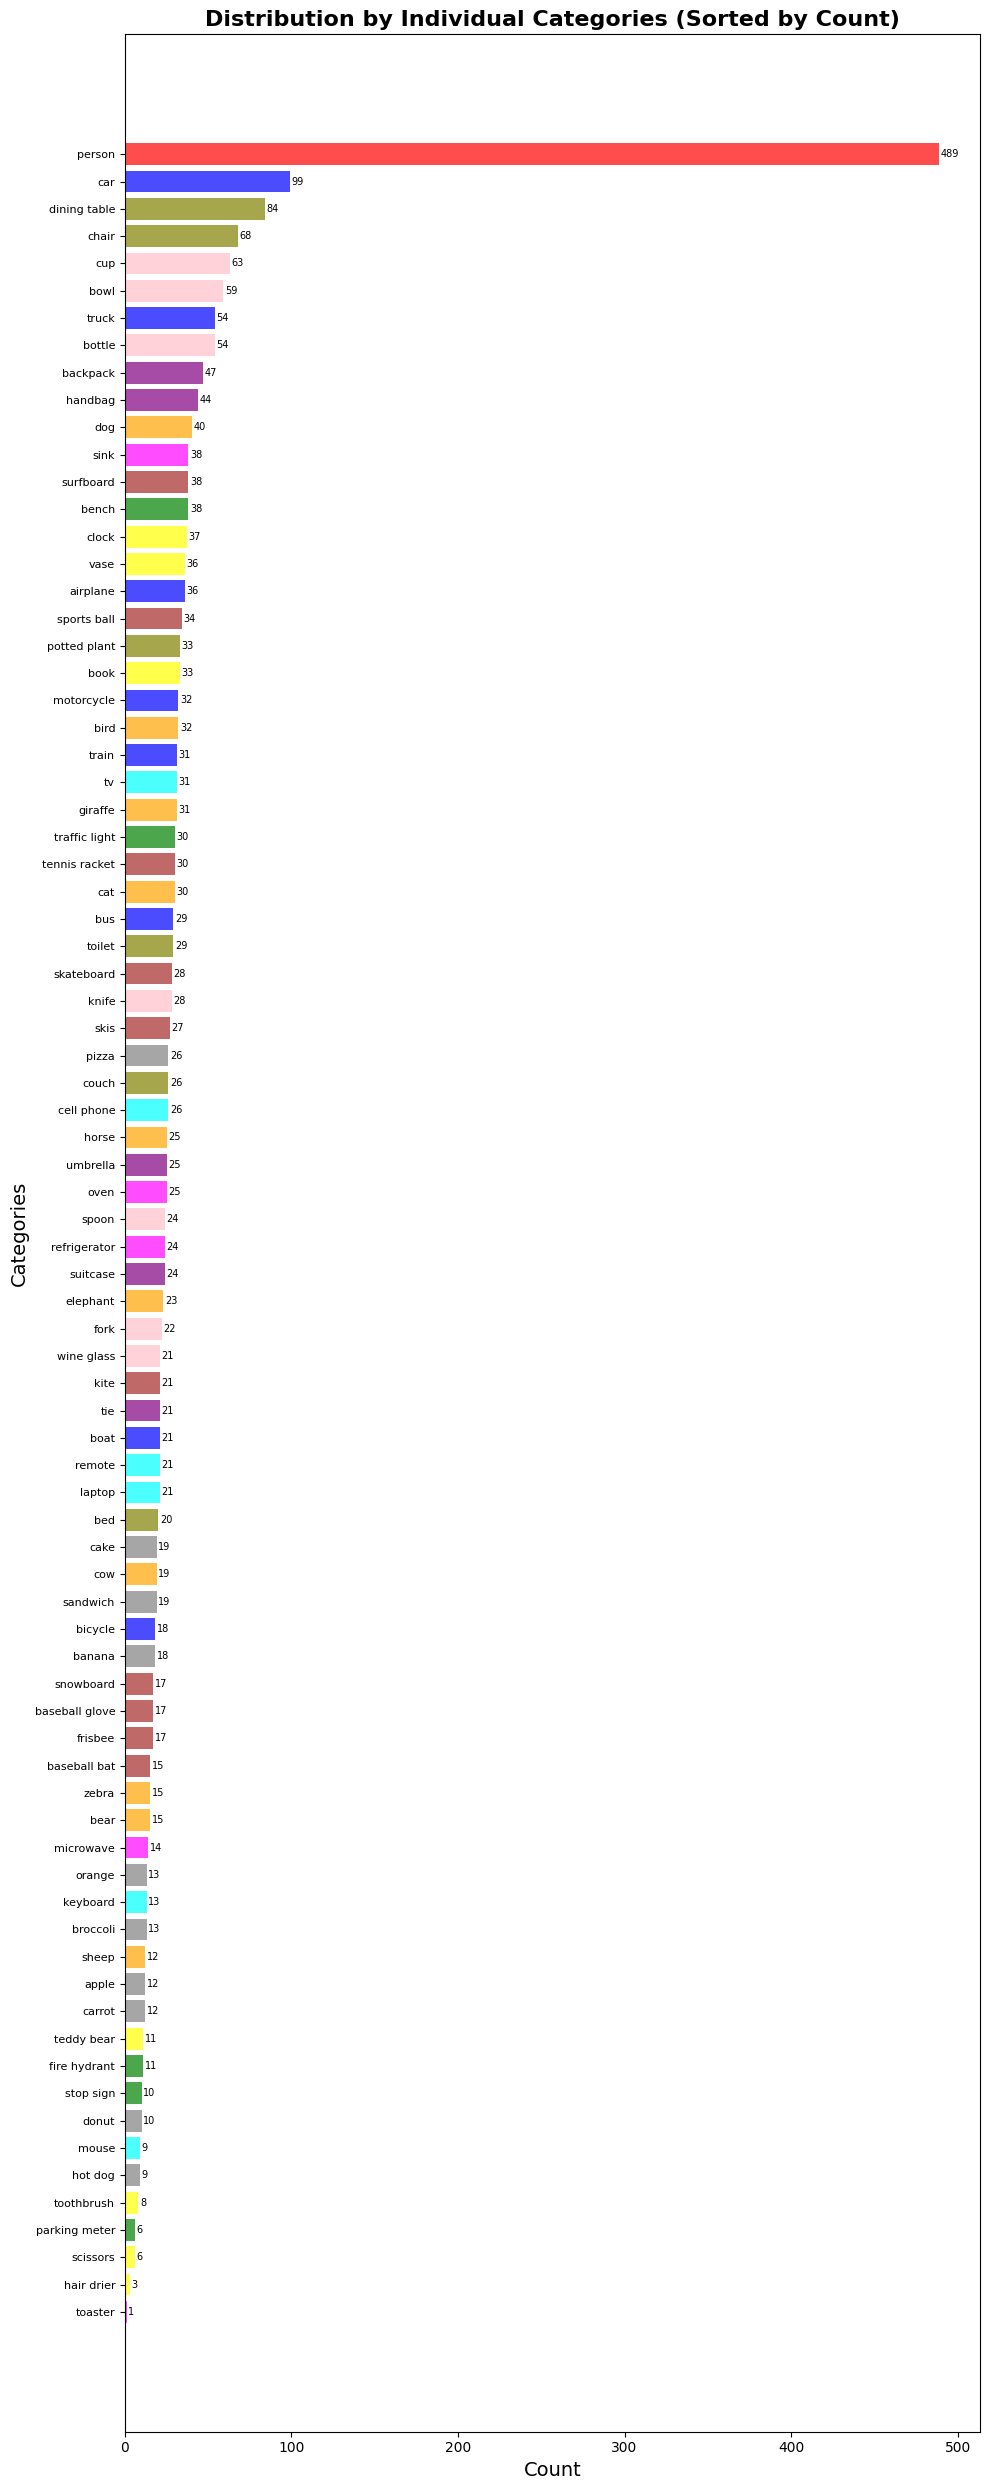

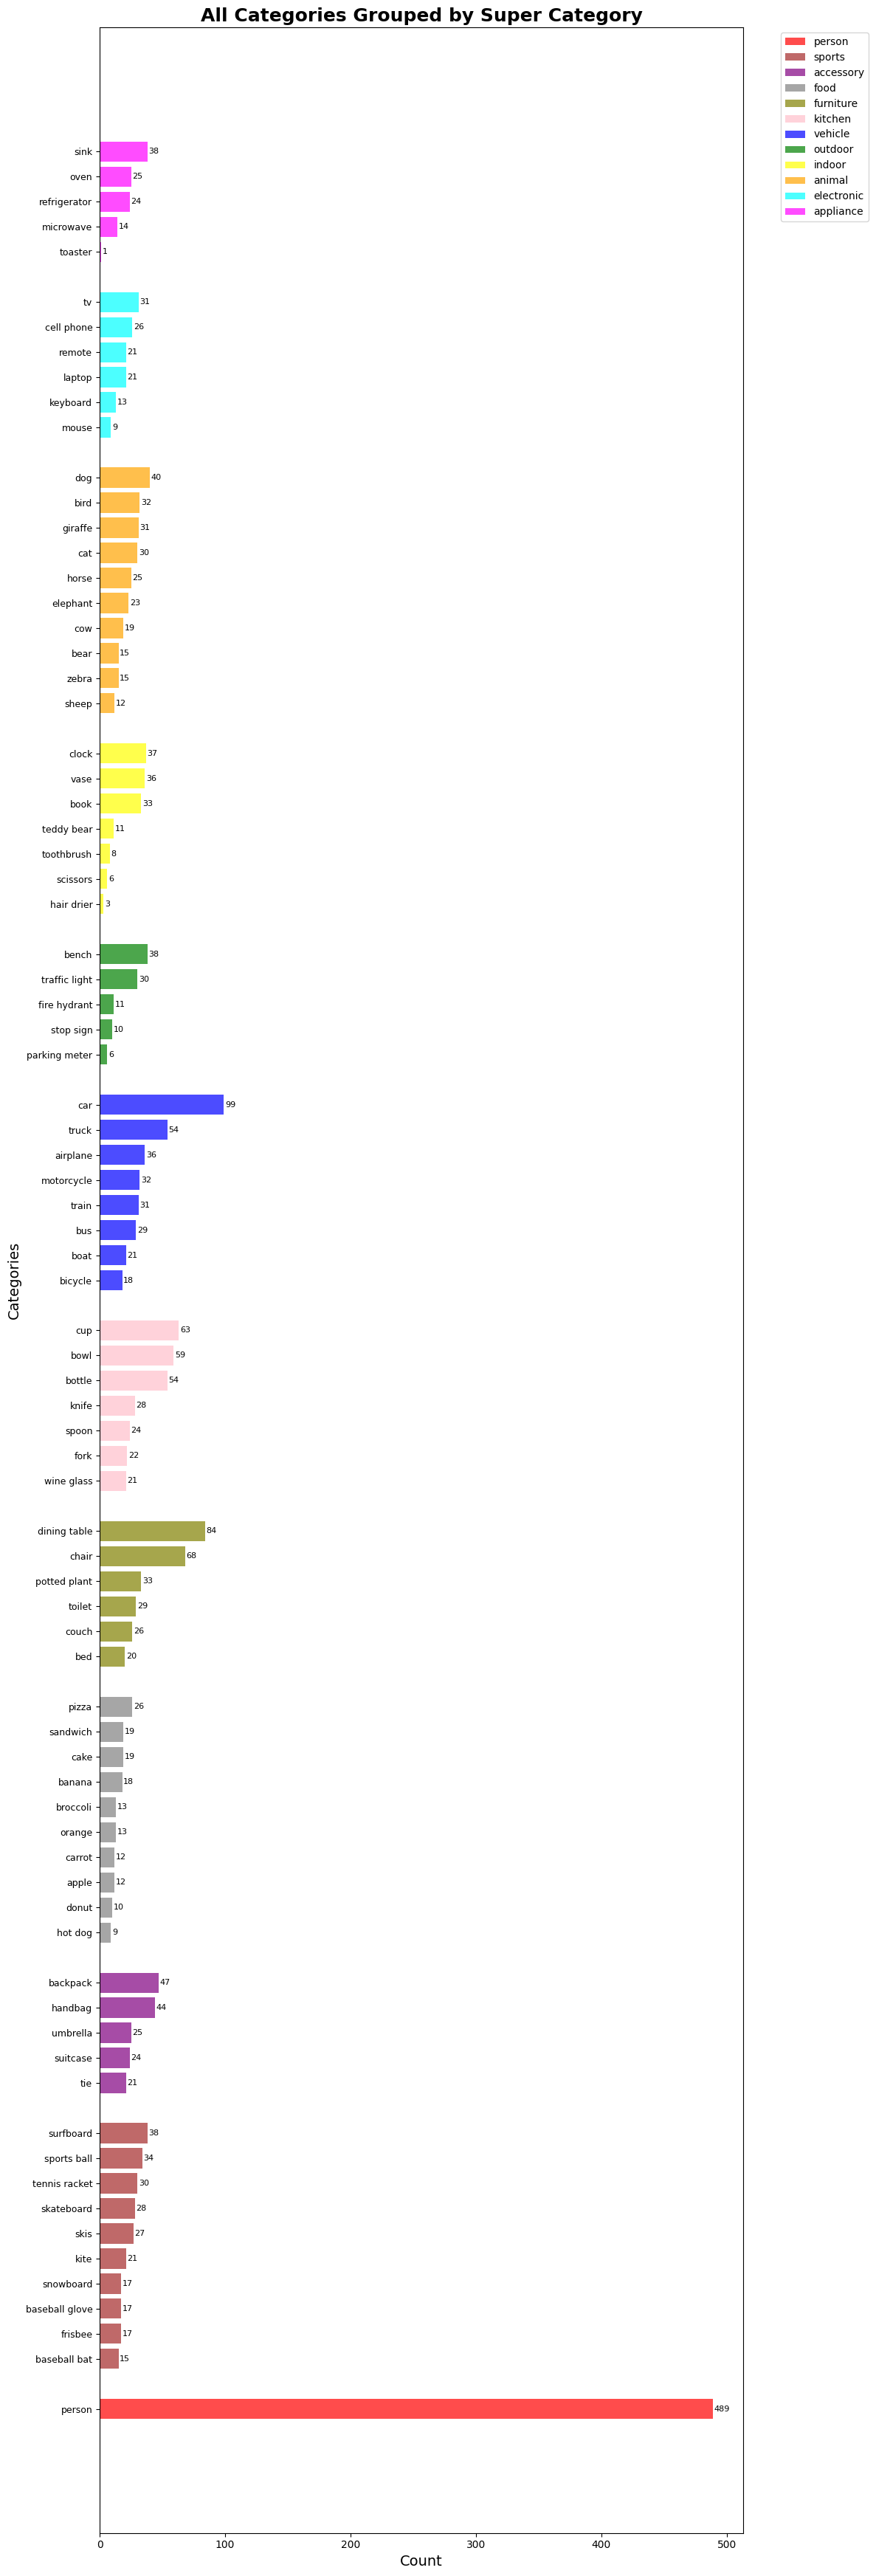

In [7]:
coco.plot_categorical_distributions()

In [7]:
test_download_dir = os.path.join(os.getcwd(), "..\\..\\data\\all-joined-1\\coco\\images")

# For testing, let's create a small subset of the dataset
original_dataset = coco.coco_dataset
coco.coco_dataset = coco.coco_dataset[:3]  # Only download first 3 images

print("Downloading first 3 images for testing...")
coco.download_images(test_download_dir)

# Restore original dataset
coco.coco_dataset = original_dataset

# Check if images were downloaded
if os.path.exists(test_download_dir):
    downloaded_files = os.listdir(test_download_dir)
    print(f"Downloaded files: {downloaded_files}")
else:
    print("Download directory not created")

Image 0.jpg already exists, skipping...
Image 1.jpg already exists, skipping...
Image 2.jpg already exists, skipping...
Downloaded files: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '101.jpg', '102.jpg', '103.jpg', '104.jpg', '105.jpg', '106.jpg', '107.jpg', '108.jpg', '109.jpg', '11.jpg', '110.jpg', '111.jpg', '112.jpg', '113.jpg', '114.jpg', '115.jpg', '116.jpg', '117.jpg', '118.jpg', '119.jpg', '12.jpg', '120.jpg', '121.jpg', '122.jpg', '123.jpg', '124.jpg', '125.jpg', '126.jpg', '127.jpg', '128.jpg', '129.jpg', '13.jpg', '130.jpg', '131.jpg', '132.jpg', '133.jpg', '134.jpg', '135.jpg', '136.jpg', '137.jpg', '138.jpg', '139.jpg', '14.jpg', '140.jpg', '141.jpg', '142.jpg', '143.jpg', '144.jpg', '145.jpg', '146.jpg', '147.jpg', '148.jpg', '149.jpg', '15.jpg', '150.jpg', '151.jpg', '152.jpg', '153.jpg', '154.jpg', '155.jpg', '156.jpg', '157.jpg', '158.jpg', '159.jpg', '16.jpg', '160.jpg', '161.jpg', '162.jpg', '163.jpg', '164.jpg', '165.jpg', '166.jpg', '167.jpg', '168.jpg', '169.jpg', '17

In [8]:
print("Creating categorical dataframe...")
img_cat_df = coco._create_categorical_dataframe()

print(f"Categorical dataframe shape: {img_cat_df.shape}")
print(f"Columns: {list(img_cat_df.columns[:10])}...")  # Show first 10 columns
print("\nFirst few rows:")
img_cat_df.head()

Creating categorical dataframe...
Categorical dataframe shape: (960, 92)
Columns: ['img_id', 'accessory', 'animal', 'appliance', 'electronic', 'food', 'furniture', 'indoor', 'kitchen', 'outdoor']...

First few rows:


,img_id,accessory,animal,appliance,electronic,food,furniture,indoor,kitchen,outdoor,...,toilet,toothbrush,traffic light,train,truck,tv,umbrella,vase,wine glass,zebra
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
eeg_data_path = os.path.join(os.getcwd(), "..\\..\\data\\all-joined-1\\eeg\\preprocessed")

# Check if EEG data exists
if os.path.exists(eeg_data_path):
    print(f"EEG data directory exists: {eeg_data_path}")
    eeg_files = os.listdir(eeg_data_path)
    print(f"EEG files found: {len(eeg_files)}")
    print(f"First few files: {eeg_files[:5]}")
    
    # Generate EEG-Image pairs dataframe
    output_csv_path = os.path.join(os.getcwd(), "..\\..\\data\\all-joined-1\\coco\\dataframes\\global_eeg_image_df.csv")
    
    try:
        eeg_img_df = coco.generate_eeg_image_pairs_dataframe(eeg_data_path, output_csv_path)
        print(f"EEG-Image pairs dataframe created successfully!")
        print(f"Shape: {eeg_img_df.shape}")
        print(f"Columns: {list(eeg_img_df.columns)}")
        print("\nFirst few rows:")
        print(eeg_img_df.head())
    except Exception as e:
        print(f"Error creating EEG-Image pairs dataframe: {e}")
else:
    print(f"EEG data directory not found: {eeg_data_path}")
    print("Skipping EEG-Image pairs test")

EEG data directory exists: s:\PolySecLabProjects\eeg-image-decoding\updated-code\notebooks\..\..\data\all-joined-1\eeg\preprocessed
EEG files found: 12
First few files: ['subj01_session1_eeg.fif', 'subj01_session2_eeg.fif', 'subj02_session1_eeg.fif', 'subj03_session2_eeg.fif', 'subj04_session1_eeg.fif']
Opening raw data file s:\PolySecLabProjects\eeg-image-decoding\updated-code\notebooks\..\..\data\all-joined-1\eeg\preprocessed\subj01_session1_eeg.fif...
    Range : 0 ... 1778687 =      0.000 ...  3473.998 secs
Ready.
Reading 0 ... 1778687  =      0.000 ...  3473.998 secs...
3839 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 

In [6]:
print(f"Total category distribution entries: {len(coco.category_distributions)}")

print("\nFirst 10 category distribution entries:")
for i, ((id_num, super_cat, cat), count) in enumerate(list(coco.category_distributions.items())[:10]):
    print(f"{i+1}. Category ID: {id_num}, Super: {super_cat}, Category: {cat}, Count: {count}")

Total category distribution entries: 80

First 10 category distribution entries:
1. Category ID: 1, Super: person, Category: person, Count: 489
2. Category ID: 35, Super: sports, Category: skis, Count: 27
3. Category ID: 27, Super: accessory, Category: backpack, Count: 47
4. Category ID: 61, Super: food, Category: cake, Count: 19
5. Category ID: 67, Super: furniture, Category: dining table, Count: 84
6. Category ID: 48, Super: kitchen, Category: fork, Count: 22
7. Category ID: 44, Super: kitchen, Category: bottle, Count: 54
8. Category ID: 51, Super: kitchen, Category: bowl, Count: 59
9. Category ID: 47, Super: kitchen, Category: cup, Count: 63
10. Category ID: 50, Super: kitchen, Category: spoon, Count: 24


In [13]:
unique_img_ids = eeg_img_df['img_id'].unique()
        
img_id_to_captions = {}
img_id_to_images = {}
all_captions = []
all_images = []
img_id_mapping = []

for img_id in unique_img_ids:
    img_captions = coco.coco_dataset[img_id]['captions']
    img_categories = coco.coco_dataset[img_id]['categories']
    
    # Extract super and fine categories
    super_categories = list(set([cat['supercategory_name'] for cat in img_categories]))
    fine_categories = list(set([cat['category_name'] for cat in img_categories]))
    
    # Create descriptive caption
    descriptive_caption = coco._create_descriptive_caption(super_categories, fine_categories)
    
    # Use descriptive caption for all instances of this image
    augmented_captions = [caption + " " + descriptive_caption for caption in img_captions]
    all_captions.extend(augmented_captions)

In [15]:
all_captions

['Surfer riding wild breaking waves near ocean beach. This image contains person/people and sports (specifically surfboard).',
 'Man standing on surfboard riding wave in ocean.  This image contains person/people and sports (specifically surfboard).',
 'A man stands erect on his surfboard despite strong waves. This image contains person/people and sports (specifically surfboard).',
 'a person riding a surf board on a wave  This image contains person/people and sports (specifically surfboard).',
 'A man that is in the water on a surfboard. This image contains person/people and sports (specifically surfboard).',
 'Zebras in captivity illuminated by lights in their enclosure. This image contains animal (specifically zebra).',
 'A zebra standing on top of  a grass covered field. This image contains animal (specifically zebra).',
 'A light shows zebra grazing in a forest. This image contains animal (specifically zebra).',
 'A zebra bent over eating some hay.surrounded by small trees. This im